<a href="https://colab.research.google.com/github/CompPhysics/InsightPhysicsImmersionWeek/blob/main/insight_hlophe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Harmonic oscillator**

Linda Hlophe

June 2021

Physics Immersion Week

06/25/21


## Hookes Law


![]
For classical systems, the dynamics are governed by Newton's second law:

\begin{equation} 
 force~(\vec{F}) = mass~(m)~\times~accelerations~(\vec{a}).
\end{equation} 

In one dimenion, the acceleration is given by the second order derivative of position with repsect to time

$$ a = \frac{d^2x}{dt^2}.$$

Consider a mass ($m$) attached to a spring with constant $k$, oscillating in one dimension with natural length $x_0$. The force is given by Hooke's law 

\begin{equation} 
 F(x) = -kx.
\end{equation} 

Substituting the expressions for the acceleration and the force into Newton's second law gives 
\begin{equation} 
  m\frac{d^2x}{dt^2} = -k(x-x_0).
\end{equation} 

## Solving the equation of motion

Introducing an angular frequency 

\begin{equation}
  \omega =\sqrt{k/m},
\end{equation}                  

we can write the equation of motion in the form

\begin{equation}
  \frac{d^2x}{dt^2} = -\omega^2 (x-x_0).
\end{equation}  

The general solution of the above differential equation is given by

$$ x(t) = A\sin(\omega t)+B\cos(\omega t).$$

The potential energy $V$ of a perfect harmonic oscillator given by an integral over the force
\begin{eqnarray}
 V(x)&=& -\int F(x)dx,\cr\
     &=&~\frac{1}{2}k(x-x_0)^2. 
\end{eqnarray}     


## Harmonic oscillator approximation for generic potenials

Generally, the potential energy is a complicated function of the distance. Still, at short distances we can perform a taylor expansion around the minimum $x_0$

$$ V(x) = V(x_0)+(x-x_0)~\frac{dV}{dx}\Big\vert_{x=x_0} +\frac{1}{2}(x-x_0)^2~\frac{d^2V}{dx^2}\Big\vert_{x=x_0}+~...$$

By defition $\frac{dV}{dx}\Big\vert_{x=x_0}=0$ since $x_0$ is the minimum. The first (constant) term does not affect the force since the force is given by a derivative of the potential. In the vicinity of $x_0$ higher order terms vanish so that

\begin{eqnarray}
 V(x)=\frac{1}{2}(x-x_0)^2~\frac{d^2V}{dx^2}\Big\vert_{x=x_0}.
 \end{eqnarray}

By comparing to the expression for the perfect oscillator, we find that the frequency is related to the constant through

$$ k=\frac{d^2V}{dx^2}\Big\vert_{x=x_0}.$$ If the coordinates are chosen so that $x_0=0$ and using the relation of the constant to the frequency

$$ k= m\omega^2,$$ 

the potential energy takes the form

\begin{eqnarray}
 V(x)=\frac{1}{2}m\omega^2x^2.
 \end{eqnarray}

 The total energy of the oscillator is thus given by the Hamiltonian

\begin{eqnarray}
 E&=&H,\cr
   &=&\frac{p^2}{2m}+V(x),\cr
   &=&\frac{p^2}{2m}+\frac{1}{2}m\omega^2x^2,
 \end{eqnarray}

where the $p$ is the momentum.

 At this point, the standard approach to quantazation can be applied, by replacing the classical momentum by the correspondign quantum-mechanical operator $p^2\rightarrow -\frac{\hbar^2}{2m}\frac{d^2}{dx^2}$, so that Hamiltionian becomes a second-order differential operator 

\begin{eqnarray}
 H&=&-\frac{\hbar^2}{2m}\frac{d^2}{dx^2}+\frac{1}{2}m\omega^2x^2.
 \end{eqnarray}

The quantum-mechanical solution is a wavefunction given as the solution to the eigenvalue equation

\begin{eqnarray}
 H\psi&=&E\psi,\cr
\end{eqnarray} 

or 

\begin{eqnarray}
 \left(-\frac{\hbar^2}{2m}\frac{d^2}{dx^2}+\frac{1}{2}m\omega^2x^2\right)\psi&=&E\psi.\cr
\end{eqnarray} 


In [31]:
# Setting up the import statements for the relevant libraries. 
# Numpy is imported so we can use arrays, math is needed for a couple
# math functions, and matplotlib is needed for graphing.

import numpy as np
from math import *
import matplotlib.pyplot as plt

In [32]:
#The classical harmonic oscillator obeys Hookes' Law

g = 9.80655 #m/s^2 g to 6 leading digits after decimal point
D = 0.00245 #m/s
m = 0.2 # kg

In [33]:
# Define Gravitational force as a vector in x and y. It is a constant.
# Here we are using a 1D array of length two to represent a point in the
# xy coordinate plane. The first coordinate is the x direction and the
# second is the y direction.  This equation says that the near-Earth
# gravitational force will be pointing downwards in only the y direction,
# which lines up with what we would expect.

G = -m*g*np.array([0.0,1])  

In [34]:

DeltaT = 0.01
tfinal = 2.0
n = ceil(tfinal/DeltaT)

In [35]:
# set up arrays for t, a, v, and x
t = np.zeros(n)
v = np.zeros((n,2))
r = np.zeros((n,2))

In [36]:
# Initial conditions as compact 2-dimensional arrays
r0 = np.array([0.0,0.0])
v0 = np.array([10.0,10.0])
r[0] = r0
v[0] = v0

In [37]:
# Start integrating using Euler's method
for i in range(n-1):
    # Set up forces, air resistance FD, not now that we need the norm of the vector
    # Here you could have defined your own function for this
    vabs = sqrt(sum(v[i]*v[i]))
    FD = -D*v[i]*vabs
    # Final net forces acting on falling object
    Fnet = FD+G
    # The accelration at a given time t_i
    a = Fnet/m
    # update velocity, time and position using Euler's method
    v[i+1] = v[i] + DeltaT*a
    r[i+1] = r[i] + DeltaT*v[i]
    t[i+1] = t[i] + DeltaT

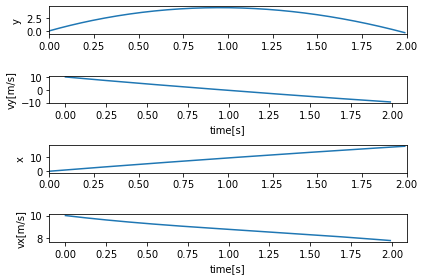

In [38]:
fig, axs = plt.subplots(4, 1)
axs[0].plot(t, r[:,1])
axs[0].set_xlim(0, tfinal)
axs[0].set_ylabel('y')
axs[1].plot(t, v[:,1])
axs[1].set_ylabel('vy[m/s]')
axs[1].set_xlabel('time[s]')
axs[2].plot(t, r[:,0])
axs[2].set_xlim(0, tfinal)
axs[2].set_ylabel('x')
axs[3].plot(t, v[:,0])
axs[3].set_ylabel('vx[m/s]')
axs[3].set_xlabel('time[s]')

# tight_layout is a function we are applying to the entire figure.  It
# just makes the figure look nicer and improves the layout.  Try it making
# the graph with and without this line (just comment it out) to see which
# version you like best.
fig.tight_layout()
